In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the dataset
df = pd.read_csv("Titanic_train.csv")


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Check data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#Select column that have object data types
colname = []
for x in df.columns:
    if df[x].dtype == object:
        colname.append(x)


In [ ]:
#Convert categorical data into numerical format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in colname:
    df[x] = le.fit_transform(df[x])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("features:", x)
    print("mapping:", le_name_mapping)

features: Name
mapping: {'Abbing, Mr. Anthony': 0, 'Abbott, Mr. Rossmore Edward': 1, 'Abbott, Mrs. Stanton (Rosa Hunt)': 2, 'Abelson, Mr. Samuel': 3, 'Abelson, Mrs. Samuel (Hannah Wizosky)': 4, 'Adahl, Mr. Mauritz Nils Martin': 5, 'Adams, Mr. John': 6, 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)': 7, 'Aks, Mrs. Sam (Leah Rosen)': 8, 'Albimona, Mr. Nassef Cassem': 9, 'Alexander, Mr. William': 10, 'Alhomaki, Mr. Ilmari Rudolf': 11, 'Ali, Mr. Ahmed': 12, 'Ali, Mr. William': 13, 'Allen, Miss. Elisabeth Walton': 14, 'Allen, Mr. William Henry': 15, 'Allison, Master. Hudson Trevor': 16, 'Allison, Miss. Helen Loraine': 17, 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)': 18, 'Allum, Mr. Owen George': 19, 'Andersen-Jensen, Miss. Carla Christine Nielsine': 20, 'Anderson, Mr. Harry': 21, 'Andersson, Master. Sigvard Harald Elias': 22, 'Andersson, Miss. Ebba Iris Alfrida': 23, 'Andersson, Miss. Ellis Anna Maria': 24, 'Andersson, Miss. Erna Alexandra': 25, 'Andersson, Miss. Ingeborg Constanzia

In [ ]:
#Check null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [ ]:
df.shape

(891, 12)

In [ ]:
#drop null values
df = df.dropna()

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

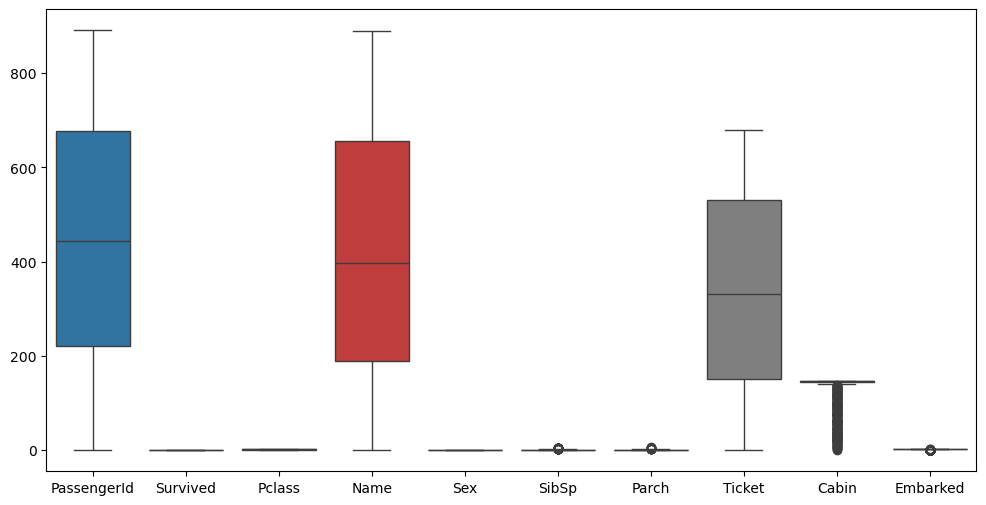

In [ ]:
#Check outliers
numeric_col = df.select_dtypes(include='int')
plt.figure(figsize=(12, 6))
sns.boxplot(data = numeric_col)
plt.show()

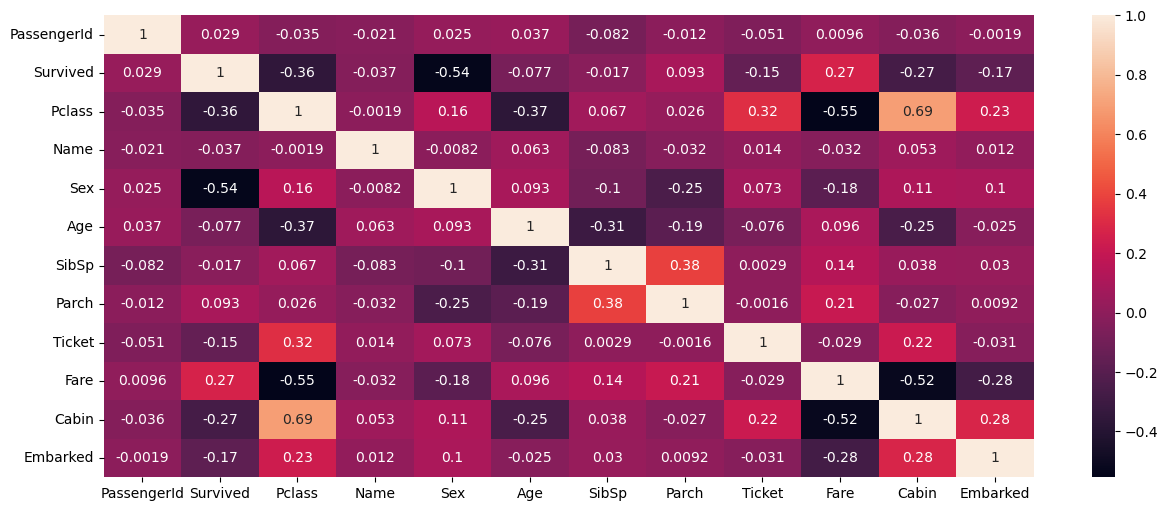

In [ ]:
#Heatmap for identify Patterns, Trends and Areas
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
x =df[['Pclass','Sex','Age','Fare']]
y =df['Survived']

In [ ]:
x

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
885,3,0,39.0,29.1250
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
889,1,1,26.0,30.0000


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [ ]:
x.shape

(714, 4)

In [ ]:
y.shape

(714,)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(571, 4)
(143, 4)
(571,)
(143,)


In [ ]:
#create model for LR

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, y_train)


LogisticRegression()

In [ ]:
#Generate prediction on Test data
y_pred = model.predict(x_test)
print(y_pred)
print(list(zip(y_test, y_pred)))


[1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0]
[(1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 0), (1, 1), (1, 1), (1, 0), (1, 0), (0, 0), (1, 0), (1, 1), (1, 0), (1, 0), (0, 0), (1, 0), (1, 1), (0, 1), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 

In [ ]:
y_pred_prob = model.predict_proba(x_test)
print(y_pred_prob)

[[0.14037432 0.85962568]
 [0.89779714 0.10220286]
 [0.19052377 0.80947623]
 [0.32975031 0.67024969]
 [0.93891574 0.06108426]
 [0.93674258 0.06325742]
 [0.30704415 0.69295585]
 [0.19167733 0.80832267]
 [0.92977622 0.07022378]
 [0.78264835 0.21735165]
 [0.92662928 0.07337072]
 [0.93475878 0.06524122]
 [0.36543589 0.63456411]
 [0.55671615 0.44328385]
 [0.60372038 0.39627962]
 [0.56278796 0.43721204]
 [0.86159677 0.13840323]
 [0.13308352 0.86691648]
 [0.47040322 0.52959678]
 [0.74176323 0.25823677]
 [0.27715657 0.72284343]
 [0.82005161 0.17994839]
 [0.63918082 0.36081918]
 [0.72690923 0.27309077]
 [0.25956966 0.74043034]
 [0.9047801  0.0952199 ]
 [0.97593893 0.02406107]
 [0.91942915 0.08057085]
 [0.90714489 0.09285511]
 [0.53711396 0.46288604]
 [0.77653021 0.22346979]
 [0.9806645  0.0193355 ]
 [0.61735411 0.38264589]
 [0.68812068 0.31187932]
 [0.96285812 0.03714188]
 [0.13955768 0.86044232]
 [0.97266041 0.02733959]
 [0.83868404 0.16131596]
 [0.90760388 0.09239612]
 [0.96281564 0.03718436]


In [ ]:
y_pred_class = []
for value in y_pred_prob[:, 1]:
    if value > 0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)


In [ ]:
#Check Model Performance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("classification_report:")
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model", acc)

[[73 14]
 [28 28]]
classification_report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78        87
           1       0.67      0.50      0.57        56

    accuracy                           0.71       143
   macro avg       0.69      0.67      0.67       143
weighted avg       0.70      0.71      0.70       143

Accuracy of the model 0.7062937062937062


In [ ]:
df['Survived'].value_counts()

Survived
0    424
1    290
Name: count, dtype: int64

In [ ]:
#using cross validation
model = LogisticRegression()

#performing kfold cross validation
from sklearn.model_selection import KFold
KFold_cv = KFold(n_splits=10, shuffle=True)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
KFold_cv_result = cross_val_score(estimator=model, X=x_train, y=y_train, cv = KFold_cv)

print(KFold_cv_result)
print(KFold_cv_result.mean())

[0.87931034 0.78947368 0.9122807  0.8245614  0.85964912 0.68421053
 0.78947368 0.8245614  0.77192982 0.77192982]
0.8107380520266183


In [ ]:
#final model training
model = LogisticRegression(max_iter=100)
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#Test Perfomance of model on testing data
test = pd.read_csv("Titanic_test.csv")

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test['Sex'] = test['Sex'].map({'male': 0, 'female':1})

In [ ]:
#Check null values
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              1
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#Replace null values with mean
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Sex'] = test['Sex'].fillna(test['Sex'].mean())
test['Fare'] = test['Fare'].fillna(test['Age'].mean())
test.drop('Cabin', inplace=True, axis=1)

In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test[['Pclass', 'Sex', 'Age', 'Fare']].isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [ ]:
#Train tset split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2, random_state=42)

In [ ]:
#test model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [ ]:
y_test_pred = model.predict(x_test)
y_test_prob = model.predict_proba(x_test)

In [ ]:
#Check Model Performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("confusion_matrix:\n", confusion_matrix(y_test, y_test_pred))

print("classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.7552447552447552
confusion_matrix:
 [[68 19]
 [16 40]]
classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80        87
           1       0.68      0.71      0.70        56

    accuracy                           0.76       143
   macro avg       0.74      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143



In [ ]:
y.shape

(714,)

In [ ]:
x_test = test[['Pclass','Sex','Age','Fare']]
y_pred = model.predict(x_test)


In [ ]:
y_final_pred = model.predict(x_test)

In [ ]:
print(y_final_pred)

[0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1
 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1
 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 1 0 0 1 1]


In [ ]:
#Submission of result
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_final_pred})
print(submission.head())
submission.to_csv("Titanic_submission.csv", index=False)

   PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         1
4          896         0


In [ ]:
#Final Submission of result
submission["Survived_Label"] = submission["Survived"].apply(lambda x:'survived' if x==1 else 'Dead')
submission.to_csv("Titanic_submission_final.csv", index=False)